In [62]:
import numpy as np
import array as ar
import wave
import contextlib

import matplotlib.pyplot as plt
from IPython.display import Audio

SR = 44100

In [63]:
# Piano key frequencies

notenames = ['A0', 'Bb0', 'B0', 'C1', 'C#1', 'D1', 'Eb1', 'E1', 'F1', 'F#1',
       'G1', 'Ab1', 'A1', 'Bb1', 'B1', 'C2', 'C#2', 'D2', 'Eb2', 'E2',
       'F2', 'F#2', 'G2', 'Ab2', 'A2', 'Bb2', 'B2', 'C3', 'C#3', 'D3',
       'Eb3', 'E3', 'F3', 'F#3', 'G3', 'Ab3', 'A3', 'Bb3', 'B3', 'C4',
       'C#4', 'D4', 'Eb4', 'E4', 'F4', 'F#4', 'G4', 'Ab4', 'A4', 'Bb4',
       'B4', 'C5', 'C#5', 'D5', 'Eb5', 'E5', 'F5', 'F#5', 'G5', 'Ab5',
       'A5', 'Bb5', 'B5', 'C6', 'C#6', 'D6', 'Eb6', 'E6', 'F6', 'F#6',
       'G6', 'Ab6', 'A6', 'Bb6', 'B6', 'C7', 'C#7', 'D7', 'Eb7', 'E7',
       'F7', 'F#7', 'G7', 'Ab7', 'A7', 'Bb7', 'B7', 'C8', 'R']

# Create chromatic scale, e.g., as on the piano, as a dictionary    

Freqs = {} 

f = 27.5

for name in notenames:
    Freqs[name] = f
    f *= 2**(1/12)

In [64]:
def readWaveFile(infile,withParams=False,asNumpy=True):
    with contextlib.closing(wave.open(infile)) as f:
        params = f.getparams()
        frames = f.readframes(params[3])
        if(params[0] != 1):
            print("Warning in reading file: must be a mono file!")
        if(params[1] != 2):
            print("Warning in reading file: must be 16-bit sample type!")
        if(params[2] != 44100):
            print("Warning in reading file: must be 44100 sample rate!")
    if asNumpy:
        X = ar.array('h', frames)
        X = np.array(X,dtype='int16')
    else:  
        X = array.array('h', frames)
    if withParams:
        return X,params
    else:
        return X

In [65]:
signal = readWaveFile('static_samples/trumpet-G4.wav')
signal = signal[len(signal)//2:len(signal)//2+800]
Audio(signal, rate=SR)

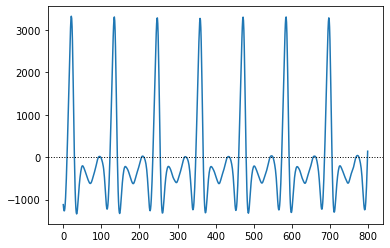

In [66]:
plt.plot(signal)
plt.axhline(linewidth=1, linestyle=':', c='black')

In [67]:
np.sign(signal[400:500])

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  1,  1,
        1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int16)

In [68]:
# get positive-going zero-crossings
# hacky way to treat 0's as positive
zero_crossings = (np.diff(np.sign(signal + 0.000001)) > 0).nonzero()[0] + 1
zero_crossings

array([ 10,  93, 123, 206, 236, 319, 348, 431, 461, 543, 574, 656, 686,
       769, 799], dtype=int64)

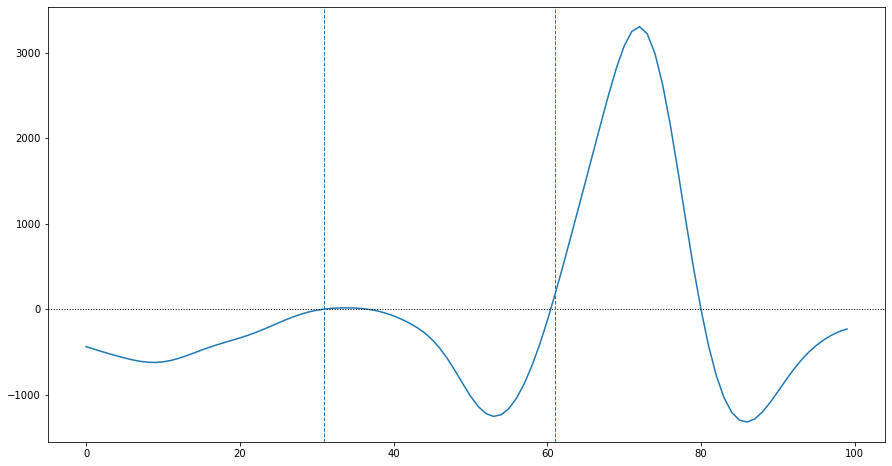

In [69]:
plt.figure(figsize=[15,8])
plt.plot(signal[400:500])
plt.axhline(linewidth=1, linestyle=':', c='black')
for x in (zero_crossings - 400)[(zero_crossings - 400) > 0]:
    if x < 100:
        plt.axvline(x=x, linewidth=1, linestyle='--')

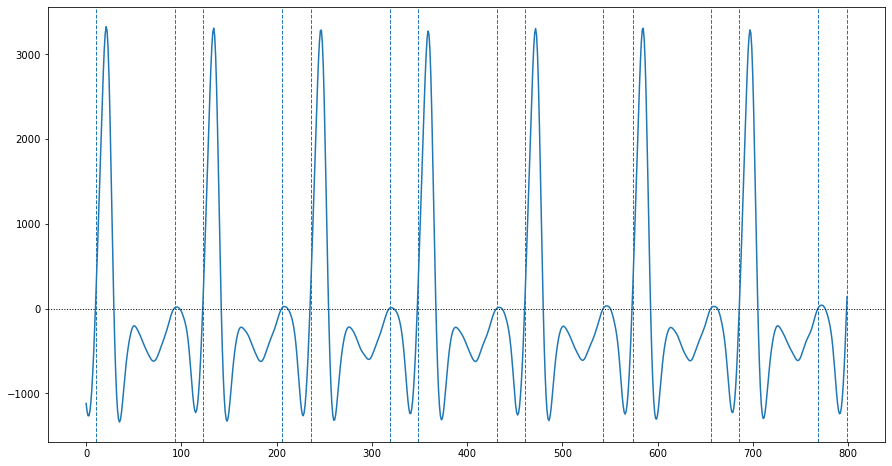

In [70]:
plt.figure(figsize=[15,8])
plt.plot(signal)
plt.axhline(linewidth=1, linestyle=':', c='black')
for x in (zero_crossings):
    if True:
        plt.axvline(x=x, linewidth=1, linestyle='--')

In [71]:
sub_seg_points = []

for i in range(0, len(zero_crossings)-1):
    seg_start = zero_crossings[i]
    seg_end = zero_crossings[i+1]
    
    # get delta size for each subsegment in the segment
    d_sub_seg = (seg_end - seg_start)//8
    
    # ignore segements with less that 8 samples
    if (d_sub_seg > 0):
        for j in range(8):
            sub_seg_points.append(seg_start + (d_sub_seg*j))
        
sub_seg_points = np.array(sub_seg_points)
sub_seg_points

array([ 10,  20,  30,  40,  50,  60,  70,  80,  93,  96,  99, 102, 105,
       108, 111, 114, 123, 133, 143, 153, 163, 173, 183, 193, 206, 209,
       212, 215, 218, 221, 224, 227, 236, 246, 256, 266, 276, 286, 296,
       306, 319, 322, 325, 328, 331, 334, 337, 340, 348, 358, 368, 378,
       388, 398, 408, 418, 431, 434, 437, 440, 443, 446, 449, 452, 461,
       471, 481, 491, 501, 511, 521, 531, 543, 546, 549, 552, 555, 558,
       561, 564, 574, 584, 594, 604, 614, 624, 634, 644, 656, 659, 662,
       665, 668, 671, 674, 677, 686, 696, 706, 716, 726, 736, 746, 756,
       769, 772, 775, 778, 781, 784, 787, 790], dtype=int64)

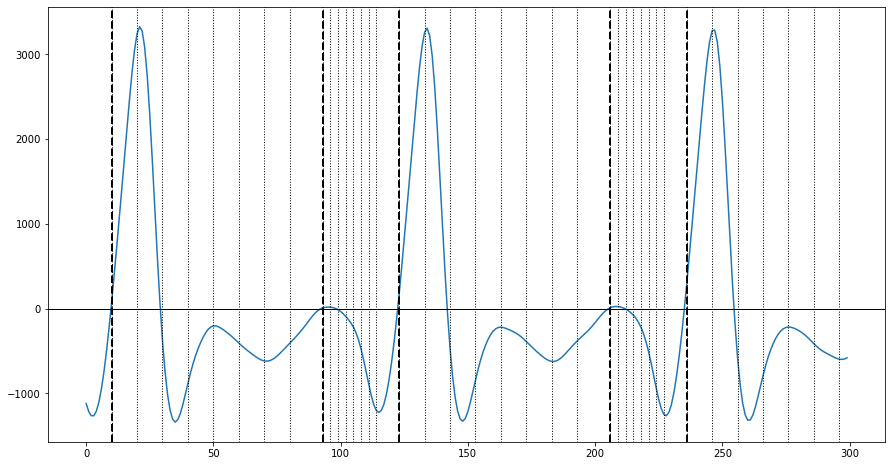

In [72]:
plt.figure(figsize=[15,8])
plt.plot(signal[:300])
plt.axhline(linewidth=1, linestyle='-', c='black')
for x in sub_seg_points[sub_seg_points < 300]:
#     plt.axvline(x=x, linewidth=1, linestyle=':', c='black', alpha=1, ymin=.1, ymax=.5)
    plt.axvline(x=x, linewidth=1, linestyle=':', c='black', alpha=1)
for x in zero_crossings[zero_crossings < 300]:
#     plt.axvline(x=x, linewidth=2, linestyle='--', c='black', ymax=.75)
    plt.axvline(x=x, linewidth=2, linestyle='--', c='black')

In [73]:
seg_landmarks = []

for seg in range(len(sub_seg_points)//8):
    landmarks = []
    for i in range(0, 3):
        landmarks.append(sub_seg_points[(i + 1)+(seg*8)])
    for i in range(4, 7):
        landmarks.append(sub_seg_points[(i + 1)+(seg*8)])
    seg_landmarks.append(landmarks)
        
seg_landmarks = np.array(seg_landmarks)
seg_landmarks

array([[ 20,  30,  40,  60,  70,  80],
       [ 96,  99, 102, 108, 111, 114],
       [133, 143, 153, 173, 183, 193],
       [209, 212, 215, 221, 224, 227],
       [246, 256, 266, 286, 296, 306],
       [322, 325, 328, 334, 337, 340],
       [358, 368, 378, 398, 408, 418],
       [434, 437, 440, 446, 449, 452],
       [471, 481, 491, 511, 521, 531],
       [546, 549, 552, 558, 561, 564],
       [584, 594, 604, 624, 634, 644],
       [659, 662, 665, 671, 674, 677],
       [696, 706, 716, 736, 746, 756],
       [772, 775, 778, 784, 787, 790]], dtype=int64)

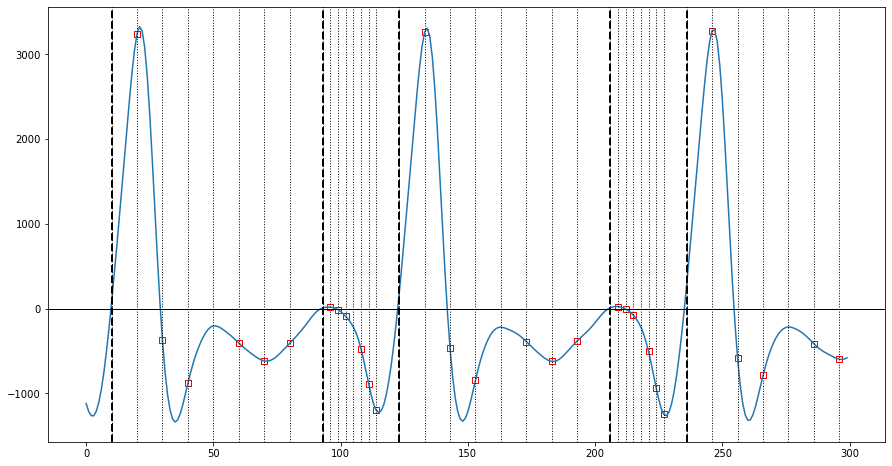

In [74]:
plt_range = 300

plt.figure(figsize=[15,8])
plt.plot(signal[:plt_range])
plt.axhline(linewidth=1, linestyle='-', c='black')
for x in sub_seg_points[sub_seg_points < plt_range]:
    plt.axvline(x=x, linewidth=1, linestyle=':', c='black', alpha=1)
for x in zero_crossings[zero_crossings < plt_range]:
    plt.axvline(x=x, linewidth=2, linestyle='--', c='black')
plt.scatter(seg_landmarks.flatten()[seg_landmarks.flatten() < plt_range], signal[seg_landmarks.flatten()][seg_landmarks.flatten() < plt_range], marker='s', facecolors='none', edgecolors='r')
# seg_landmarks.flatten()[seg_landmarks.flatten() < plt_range]

In [75]:
def get_guess():
    seg_lengths = np.diff(zero_crossings)
    longest_seg_idx = np.argmax(seg_lengths)

    for i in range(len(seg_landmarks)):
        if i != longest_seg_idx:
            longest_seg = seg_landmarks[longest_seg_idx]
            seg = seg_landmarks[i]
            similarity_ratio = np.dot(longest_seg, seg)
        
            # check if the seg is similar enough
            if (abs(seg_lengths[i] - seg_lengths[longest_seg_idx]) < 5) and (similarity_ratio > 0.75):
                dist_between_segs = 0
                start = longest_seg_idx if longest_seg_idx < i else i
                end = longest_seg_idx if longest_seg_idx > i else i
                for j in range(start, end):
                    dist_between_segs += seg_lengths[j]
                return SR / (dist_between_segs)

In [76]:
get_guess()

390.2654867256637

In [77]:
Freqs['G4']

391.99543598174995

In [78]:
def landmark_points_estimation(signal, t=0, window_size=800, distance_thresh=5, similarity_thresh=0.75, sample_rate=SR, display=True, graph_cutoff=800):
    '''
    Implementation of Waveform eriodicity Determination using Landmark Points algorithm
    described in paper by the same name by Copper & Ng, published Univeristy of Leeds
    '''
    ### get windowed signal
    # default window size suggested on pg. 72
    signal = signal[t:t+window_size]
    
    ### get positive-going zero-crossings, or segment delimeters
    positive_going_zero_crossings = (np.diff(np.sign(signal + 0.000001)) > 0).nonzero()[0] + 1
    # Hacky way to treat 0's as positive is add a really small number.
    # Reason for doing this is if the the signal happens to sample exactly at 0, it will double count it
    # as a positive-going zero crossing, when we just want the transition from negative to 0.
    
    
    ### get the locations of the sub-segments
    sub_seg_points = []

    for i in range(0, len(positive_going_zero_crossings)-1):
        seg_start = positive_going_zero_crossings[i]
        seg_end = positive_going_zero_crossings[i+1]
    
        # get delta size for each subsegment in the segment
        d_sub_seg = (seg_end - seg_start)//8
    
        # ignore segements with less that 8 samples
        if (d_sub_seg > 0):
            for j in range(8):
                sub_seg_points.append(seg_start + (d_sub_seg*j))
        
    sub_seg_points = np.array(sub_seg_points)
    
    
    ### get the 6 landmarks for each segment, store them per-segment
    seg_landmarks = []

    for seg in range(len(sub_seg_points)//8):
        landmarks = []
        for i in range(0, 3):
            landmarks.append(sub_seg_points[(i + 1)+(seg*8)])
        for i in range(4, 7):
            landmarks.append(sub_seg_points[(i + 1)+(seg*8)])
        seg_landmarks.append(landmarks)
        
    seg_landmarks = np.array(seg_landmarks)
    
    if display:
        plt_range = graph_cutoff

        plt.figure(figsize=[15,8])
        plt.plot(signal[:plt_range])
        plt.axhline(linewidth=1, linestyle='-', c='black')
        for x in sub_seg_points[sub_seg_points < plt_range]:
            plt.axvline(x=x, linewidth=1, linestyle=':', c='black', alpha=1)
        for x in positive_going_zero_crossings[positive_going_zero_crossings < plt_range]:
            plt.axvline(x=x, linewidth=2, linestyle='--', c='black')
        plt.scatter(seg_landmarks.flatten()[seg_landmarks.flatten() < plt_range], signal[seg_landmarks.flatten()][seg_landmarks.flatten() < plt_range], marker='s', facecolors='none', edgecolors='r')
    
    ### finally, calculate a guess
    seg_lengths = np.diff(positive_going_zero_crossings)
    # get index of longest seg
    # every other seg will be compared to this one
    longest_seg_idx = np.argmax(seg_lengths)

    for i in range(len(seg_landmarks)):
        if i != longest_seg_idx:
            longest_seg = seg_landmarks[longest_seg_idx]
            seg = seg_landmarks[i]
            similarity_ratio = np.dot(longest_seg, seg) # similarity metric, pg. 72
        
            # check if the seg is similar enough
            # Optimal distance and similarity thresholds from pg. 73 set as default
            if (abs(seg_lengths[i] - seg_lengths[longest_seg_idx]) < distance_thresh) and (similarity_ratio > similarity_thresh):
                dist_between_segs = 0
                start = longest_seg_idx if longest_seg_idx < i else i
                end = longest_seg_idx if longest_seg_idx > i else i
                for j in range(start, end):
                    dist_between_segs += seg_lengths[j]
                if dist_between_segs == 0:
                    # if the segs are adjacent
                    sample_rate / seg_lengths[longest_seg_idx]
                else:
                    return sample_rate / (dist_between_segs) # formula for getting freq est, pg. 73
            
    return sample_rate / seg_lengths[longest_seg_idx] # if can't be calculated, just use the largest segment

Landmark points estimation: 390.2654867256637
Actual frequency: 391.99543598174995
Error in Hz: -1.729949256086229


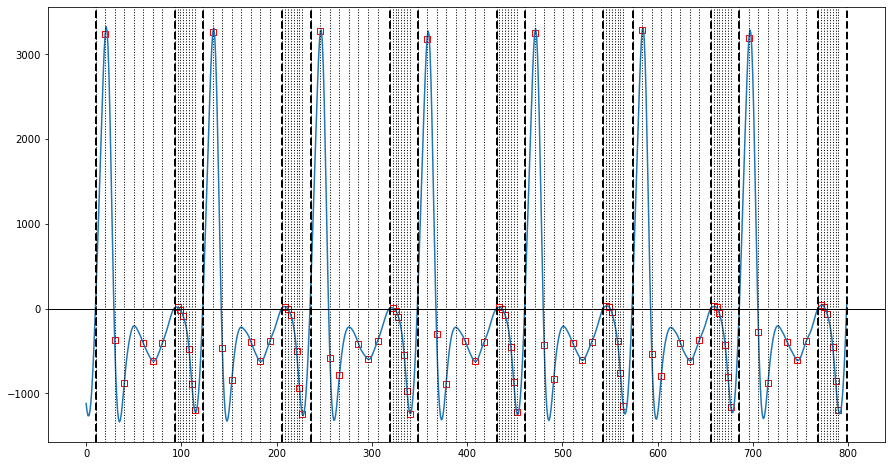

In [79]:
signal = readWaveFile('static_samples/trumpet-G4.wav')

lpe = landmark_points_estimation(signal, t=len(signal)//2)
print("Landmark points estimation:", lpe)
print("Actual frequency:", Freqs['G4'])
print("Error in Hz:", lpe - Freqs['G4'])

Landmark points estimation: 390.2654867256637
Actual frequency: 391.99543598174995
Error in Hz: -1.729949256086229


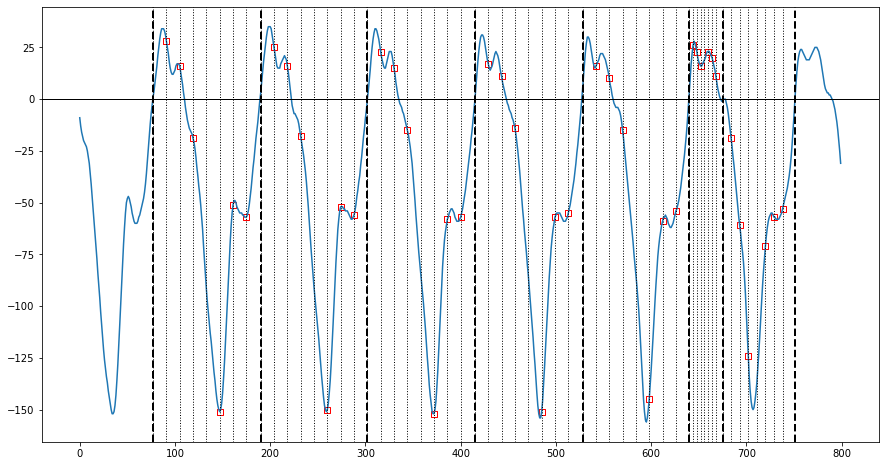

In [80]:
signal = readWaveFile('static_samples/piano-G4.wav')

lpe = landmark_points_estimation(signal, t=len(signal)//2)
print("Landmark points estimation:", lpe)
print("Actual frequency:", Freqs['G4'])
print("Error in Hz:", lpe - Freqs['G4'])

Landmark points estimation: 262.5
Actual frequency: 261.62556530059896
Error in Hz: 0.8744346994010357


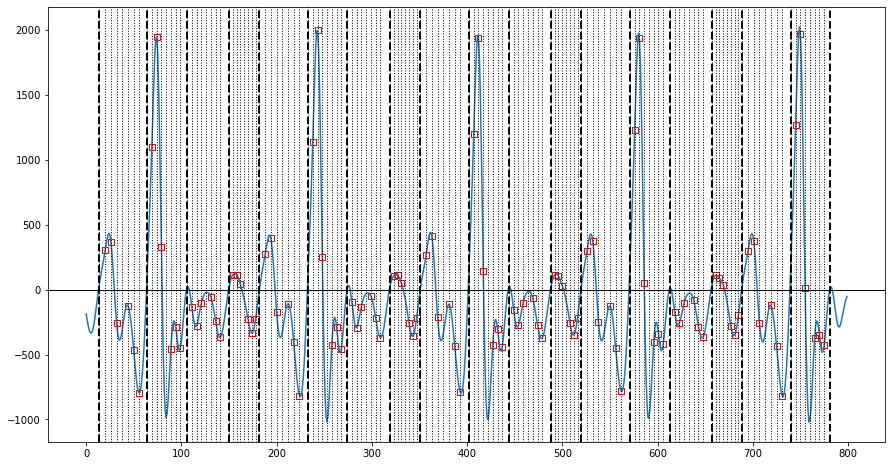

In [81]:
signal = readWaveFile('static_samples/trumpet-C4.wav')

lpe = landmark_points_estimation(signal, t=len(signal)//2)
print("Landmark points estimation:", lpe)
print("Actual frequency:", Freqs['C4'])
print("Error in Hz:", lpe - Freqs['C4'])

~~So here, the violin's f0 actually can't be estimated until we increase the window size to 1575 samples. This is the exact size that detects a segment that is the first proper length to estimate the fundamental from our starting point of halfway into the signal.~~

~~The reason for this is the violin's signal creeps just past the 0 threshold in every long segment and cuts it in half, yielding an erroenous guess of 1 octave below where it should.~~

~~This suggests that for instruments with more temperamental timbres, we might want a larger window size for the algorithm.~~

The algorithm really has trouble with the violin... it either reports over by an octave or under by an octave

Landmark points estimation: 131.25
Actual frequency: 261.62556530059896
Error in Hz: -130.37556530059896


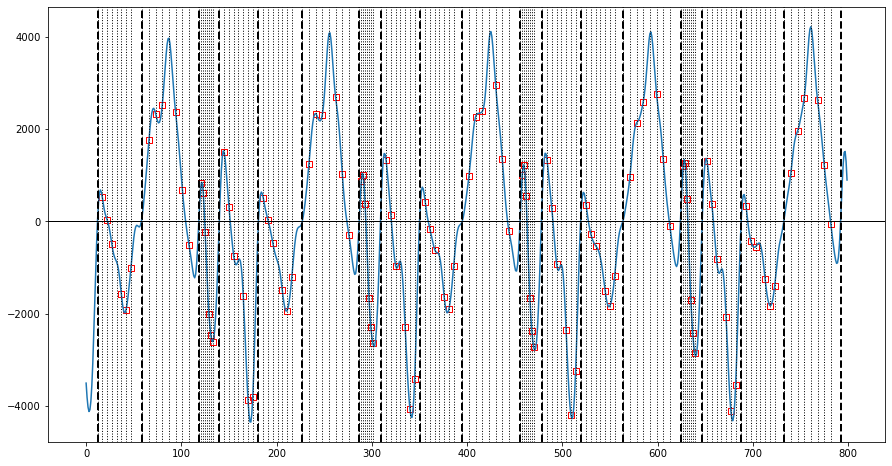

In [82]:
signal = readWaveFile('static_samples/violin-C4.wav')

lpe = landmark_points_estimation(signal, t=len(signal)//2)
print("Landmark points estimation:", lpe)
print("Actual frequency:", Freqs['C4'])
print("Error in Hz:", lpe - Freqs['C4'])

Landmark points estimation: 132.43243243243242
Actual frequency: 261.62556530059896
Error in Hz: -129.19313286816654


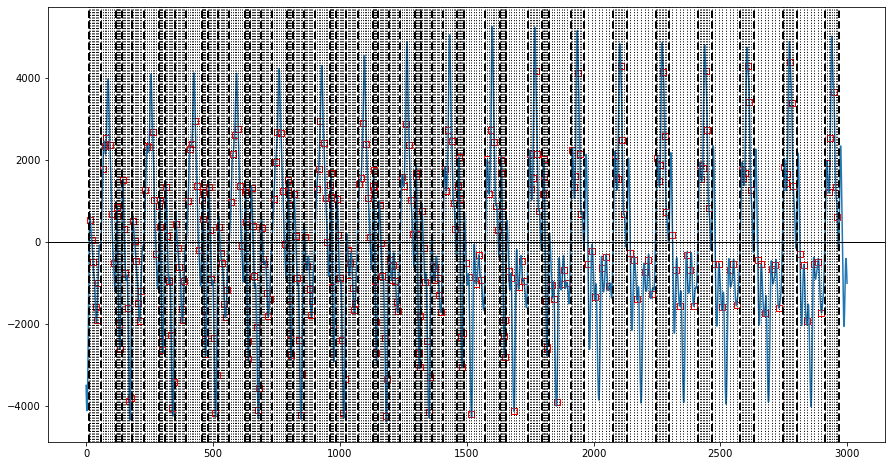

In [83]:
signal = readWaveFile('static_samples/violin-C4.wav')

lpe = landmark_points_estimation(signal, t=len(signal)//2, window_size=3000, graph_cutoff=3000)
print("Landmark points estimation:", lpe)
print("Actual frequency:", Freqs['C4'])
print("Error in Hz:", lpe - Freqs['C4'])

Works on the flute tho... phew :)

Landmark points estimation: 262.5
Actual frequency: 261.62556530059896
Error in Hz: 0.8744346994010357


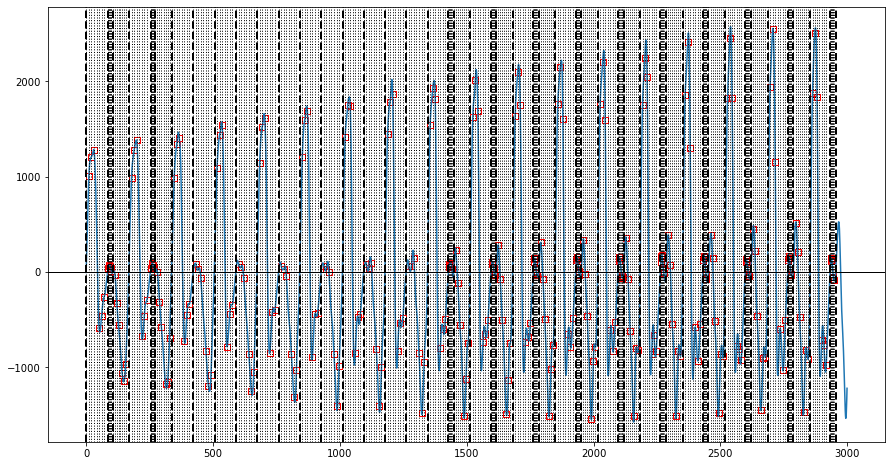

In [84]:
signal = readWaveFile('static_samples/flute-C4.wav')

lpe = landmark_points_estimation(signal, t=len(signal)//2, window_size=3000, graph_cutoff=3000)
print("Landmark points estimation:", lpe)
print("Actual frequency:", Freqs['C4'])
print("Error in Hz:", lpe - Freqs['C4'])